<a href="https://colab.research.google.com/github/GodR4zor/credit_analysys/blob/main/Analise_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import trim_mean

In [ ]:
# Carregando data frame
df = pd.read_csv('/content/drive/MyDrive/PII_Estatistica/Operacao_Credito.csv', sep=';', encoding='latin-1')

In [ ]:
df.head()
plt.style.use('ggplot')

In [ ]:
# Funcoes de conversão

def Billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fBI' % (x * 1e-9)

def Millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fMI' % (x * 1e-6)

In [ ]:
df.dtypes

Interessado                object
UF                         object
Tipo de interessado        object
Tipo de operação           object
Finalidade                 object
Tipo de credor             object
Credor                     object
Moeda                      object
Valor                      object
Número do Processo/PVL     object
Código IBGE               float64
Status                     object
Data                       object
Analisado por              object
dtype: object

# Tratamento dos dados
*Convertendo tipo das variáveis e tratando linhas com valores faltantes.*

In [ ]:
# Identificando valores faltantes
df.isnull().sum()

Interessado                0
UF                         0
Tipo de interessado        0
Tipo de operação           0
Finalidade                 0
Tipo de credor             0
Credor                     0
Moeda                      0
Valor                      0
Número do Processo/PVL     0
Código IBGE               15
Status                     0
Data                       0
Analisado por              0
dtype: int64

In [ ]:
# Apagando valores faltantes da coluna "Codigo IBGE"
df.dropna(subset=['Código IBGE'], inplace=True)
df.isnull().sum()

Interessado               0
UF                        0
Tipo de interessado       0
Tipo de operação          0
Finalidade                0
Tipo de credor            0
Credor                    0
Moeda                     0
Valor                     0
Número do Processo/PVL    0
Código IBGE               0
Status                    0
Data                      0
Analisado por             0
dtype: int64

In [ ]:
# Alterando tipo dos dados
# 1 Alterando o tipo da coluna valor para float.
df['Valor'] = df['Valor'].str.replace('.', '').str.replace(',', '.').astype('float')

In [ ]:
# 2 Alterando o tipo da coluna data para data
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Interessado                       object
UF                                object
Tipo de interessado               object
Tipo de operação                  object
Finalidade                        object
Tipo de credor                    object
Credor                            object
Moeda                             object
Valor                            float64
Número do Processo/PVL            object
Código IBGE                      float64
Status                            object
Data                      datetime64[ns]
Analisado por                     object
dtype: object

In [ ]:
# Convertendo valores cientificos
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25772 entries, 0 to 25786
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Interessado             25772 non-null  object        
 1   UF                      25772 non-null  object        
 2   Tipo de interessado     25772 non-null  object        
 3   Tipo de operação        25772 non-null  object        
 4   Finalidade              25772 non-null  object        
 5   Tipo de credor          25772 non-null  object        
 6   Credor                  25772 non-null  object        
 7   Moeda                   25772 non-null  object        
 8   Valor                   25772 non-null  float64       
 9   Número do Processo/PVL  25772 non-null  object        
 10  Código IBGE             25772 non-null  float64       
 11  Status                  25772 non-null  object        
 12  Data                    25772 non-null  datetime64[

# Analise exploratória

*Analisar a politica de endividamento dos estados nos últimos 5 anos e analisar uma possível correlação com o crescimento do PIB.*

In [ ]:
# Separando os ultimos 5 anos
db = df[(df['Data'].dt.year >= 2018) & (df['Data'].dt.year < 2024)]
db['Status'].unique()

array(['Deferido (PVL-IF)', 'Arquivado a pedido', 'Deferido',
       'Encaminhado à PGFN com manifestação técnica favorável',
       'Arquivado por decurso de prazo', 'Regularizado',
       'Deferido (decisão judicial)',
       'Encaminhado à PGFN (decisão judicial)',
       'Em retificação pelo interessado (PVL-IF)', 'Cancelado',
       'Em retificação pelo interessado', 'Arquivado a pedido (PVL-IF)',
       'Arquivado pela STN', 'Enviado à instituição financeira (PVL-IF)',
       'Devolvido', 'Em análise (PVL-IF)', 'Regular por decisão judicial',
       'Em retificação pelo credor (PVL-IF)',
       'Arquivado por decurso de prazo (PVL-IF)',
       'Em retificação pelo credor', 'Indeferido (PVL-IF)',
       'PVL cancelado', 'Assinado pelo interessado (retificação)',
       'Pendente de regularização', 'Em consulta jurídica'], dtype=object)

In [ ]:
# Credito aprovado
db_moeda_real = db[db['Moeda'] == 'Real']
db_credito_aprv = db_moeda_real[(db_moeda_real['Status'] == 'Deferido') | (db_moeda_real['Status'] == 'Deferido (PVL-IF)') | (db_moeda_real['Status'] == 'Deferido (decisão judicial)')]
db_moeda_real

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
5,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"700,000.00",PVL02.007525/2019-74,"3,100,104.00",Deferido (PVL-IF),2019-11-20,Instituição Financeira
6,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"2,000,000.00",PVL02.007207/2022-17,"3,100,104.00",Deferido (PVL-IF),2022-09-22,Instituição Financeira
7,Abadiânia,GO,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"4,000,000.00",PVL02.001729/2023-88,"5,200,100.00",Deferido (PVL-IF),2023-06-30,Instituição Financeira
10,Abaeté,MG,Município,Operação Contratual Interna (com garantia da U...,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"2,500,000.00",17944.103101/2020-36,"3,100,203.00",Arquivado a pedido,2023-07-20,STN
11,Abaeté,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco do Brasil S/A,Real,"700,000.00",PVL02.000722/2021-87,"3,100,203.00",Deferido (PVL-IF),2021-07-19,Instituição Financeira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,Áurea,RS,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"3,800,000.00",PVL02.002563/2023-17,"4,301,552.00",Deferido (PVL-IF),2023-07-10,Instituição Financeira
25783,Ângulo,PR,Município,Operação Contratual Interna,"Aquisição de terrenos, imóveis e/ou construção...",Instituição Financeira Nacional,Agência de Fomento do Paraná S/A,Real,"1,000,000.00",PVL02.000681/2021-29,"4,101,150.00",Deferido (PVL-IF),2021-07-22,Instituição Financeira
25784,Óbidos,PA,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"2,000,000.00",PVL02.001564/2023-44,"1,505,106.00",Deferido (PVL-IF),2023-05-29,Instituição Financeira
25785,Óbidos,PA,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"1,000,000.00",PVL02.001583/2023-71,"1,505,106.00",Deferido (PVL-IF),2023-05-29,Instituição Financeira


In [ ]:
import numpy as np

def trimmed_mean(data, weights, proportion_to_cut):
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]

    n = len(data)
    trim = int(n * proportion_to_cut)

    trimmed_data = sorted_data[trim:n-trim]
    trimmed_weights = sorted_weights[trim:n-trim]

    return np.sum(trimmed_data * trimmed_weights) / np.sum(trimmed_weights)

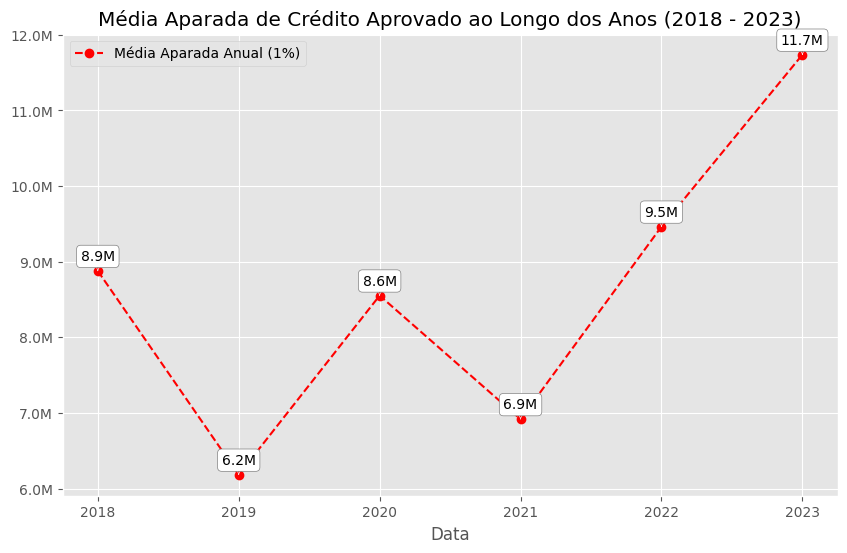

In [ ]:
# Função para formatar valores em milhões
def Millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Calcular a média aparada para cada ano
media_aparada_ano = db_credito_aprv.groupby(db_credito_aprv['Data'].dt.year)['Valor'].apply(lambda x: trim_mean(x, 0.01))

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar a média aparada ao longo dos anos
media_aparada_ano.plot(ax=ax, marker='o', linestyle='--', color='red', label='Média Aparada Anual (1%)')

# Configurar o eixo y para formatar os valores em milhões
formatter = FuncFormatter(Millions)
ax.yaxis.set_major_formatter(formatter)

# Adicionar o título do gráfico
plt.title('Média Aparada de Crédito Aprovado ao Longo dos Anos (2018 - 2023)')

# Anotar os valores no gráfico para a média aparada
for year, value in media_aparada_ano.items():
    ax.annotate(f'{value * 1e-6:.1f}M', xy=(year, value), xytext=(year, value + 0.1e6),  # Ajuste aqui a posição vertical
                textcoords='data', ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Mostrar a legenda
ax.legend()

# Mostrar o gráfico
plt.show()


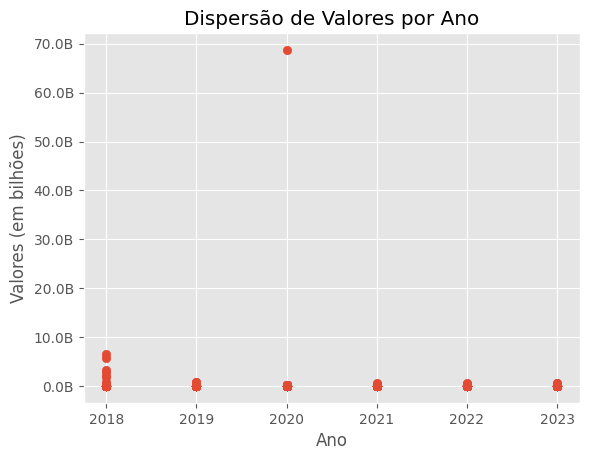

In [ ]:
x = db_credito_aprv['Data'].dt.year
y = db_credito_aprv['Valor']

plt.scatter(x, y)

def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'  # Divida por 1.000.000.000 para exibir em bilhões

# Aplicando a formatação ao eixo y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))

plt.title('Dispersão de Valores por Ano')
plt.xlabel('Ano')
plt.ylabel('Valores (em bilhões)')
plt.show()

In [ ]:
max_valor_index = db_credito_aprv['Valor'].idxmax()

# Obter a linha correspondente
linha_max_valor = db_credito_aprv.loc[max_valor_index]

print(linha_max_valor)

Interessado                         Rio Grande do Sul
UF                                                 RS
Tipo de interessado                            Estado
Tipo de operação          Operação Contratual Interna
Finalidade                    Renegociação de dívidas
Tipo de credor                                  União
Credor                                          União
Moeda                                            Real
Valor                               68,742,230,547.99
Número do Processo/PVL           17944.101632/2017-99
Código IBGE                                     43.00
Status                                       Deferido
Data                              2020-11-13 00:00:00
Analisado por                                     STN
Name: 19155, dtype: object


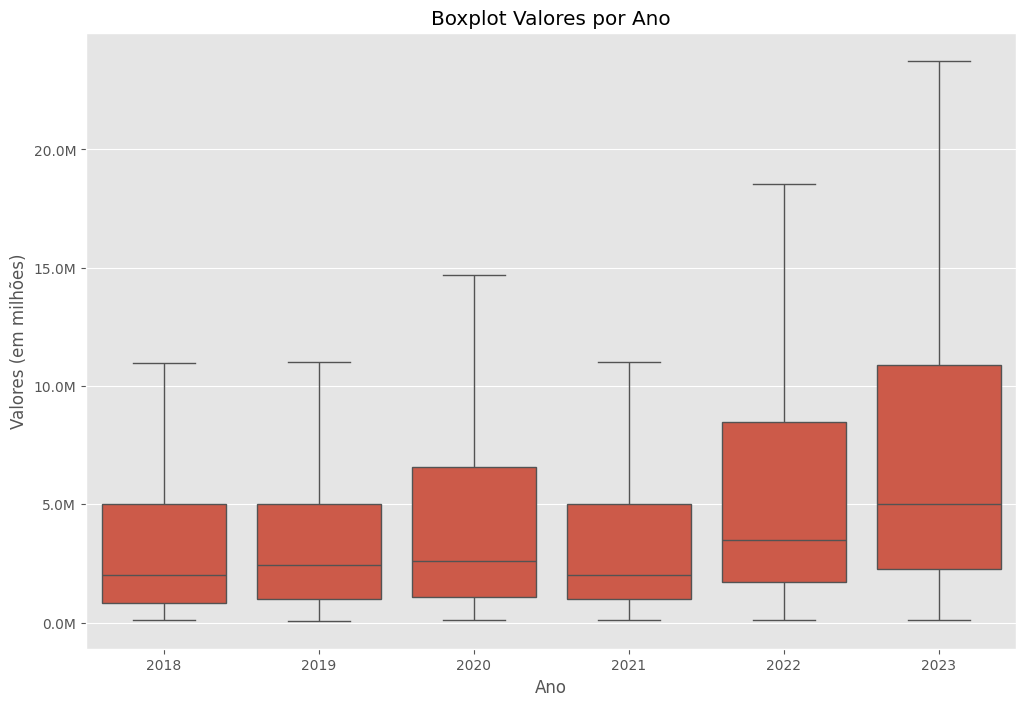

In [ ]:
plt.figure(figsize=(12, 8))

# Limitando os valores extremos
sns.boxplot(x=db_credito_aprv['Data'].dt.year, y=db_credito_aprv['Valor'], showfliers=False)

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'  # Divida por 1.000.000 para exibir em milhões

# Aplicando a formatação ao eixo y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.title('Boxplot Valores por Ano')
plt.xlabel('Ano')
plt.ylabel('Valores (em milhões)')
plt.show()



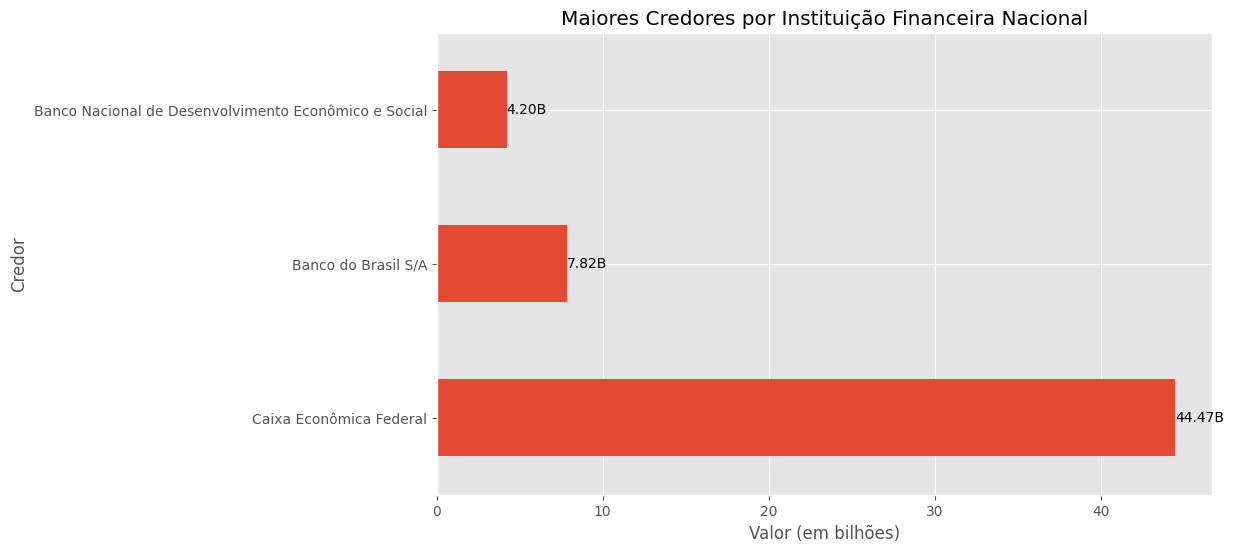

In [ ]:
# Filtrando os credores nacionais
db_credor_nacional = db_credito_aprv[db_credito_aprv['Tipo de credor'] == 'Instituição Financeira Nacional']

# Calculando a soma dos valores para cada credor
db_credor = db_credor_nacional.groupby('Credor')['Valor'].sum()

# Convertendo os valores para bilhões
db_credor_bilhoes = db_credor / 1e9  # Divida por 1.000.000.000 para converter para bilhões

# Plotando os maiores credores nacionais em bilhões com os valores nas barras
plt.figure(figsize=(10, 6))
ax = db_credor_bilhoes.nlargest(3).plot(kind='barh')
plt.xlabel('Valor (em bilhões)')
plt.ylabel('Credor')
plt.title('Maiores Credores por Instituição Financeira Nacional')

# Adicionando os valores nas barras
for i, v in enumerate(db_credor_bilhoes.nlargest(3).values):
    ax.text(v, i, f'{v:.2f}B', va='center')

plt.show()


UF
AC           3,750,000.00
AL           5,000,000.00
AM           4,450,000.00
AP           4,996,100.00
BA          15,772,722.09
CE          10,496,619.78
ES          13,840,364.98
GO          10,358,500.00
MA           6,360,000.00
MG           4,670,362.53
MS          18,451,742.85
MT          27,516,535.11
PA          65,833,522.24
PB             705,000.00
PE          37,126,953.40
PI          18,809,870.89
PR           3,533,421.71
RJ          35,357,526.22
RN          73,592,392.42
RO          12,388,689.50
RR          15,000,000.00
RS         571,144,582.99
SC           5,728,681.00
SE         200,000,000.00
SP           9,438,998.87
TO          24,522,148.33
Name: Valor, dtype: float64


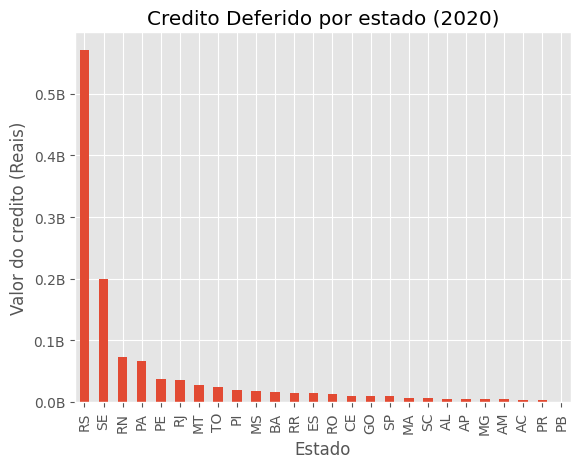

In [ ]:
# Gastos em reais por estado.
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))
db_2020 = db_credito_aprv[db_credito_aprv['Data'].dt.year == 2020]
db_estado_real = db_2020.groupby('UF')['Valor'].mean()
print(db_estado_real)
db_ordenado_real = db_estado_real.sort_values(ascending=False).plot.bar()
plt.xlabel('Estado')
plt.ylabel('Valor do credito (Reais)')
plt.title('Credito Deferido por estado (2020)');

# Avaliação de investimento em setores fundamentais (Segurança Pública, Saneamento Básico, Infraestrutura)

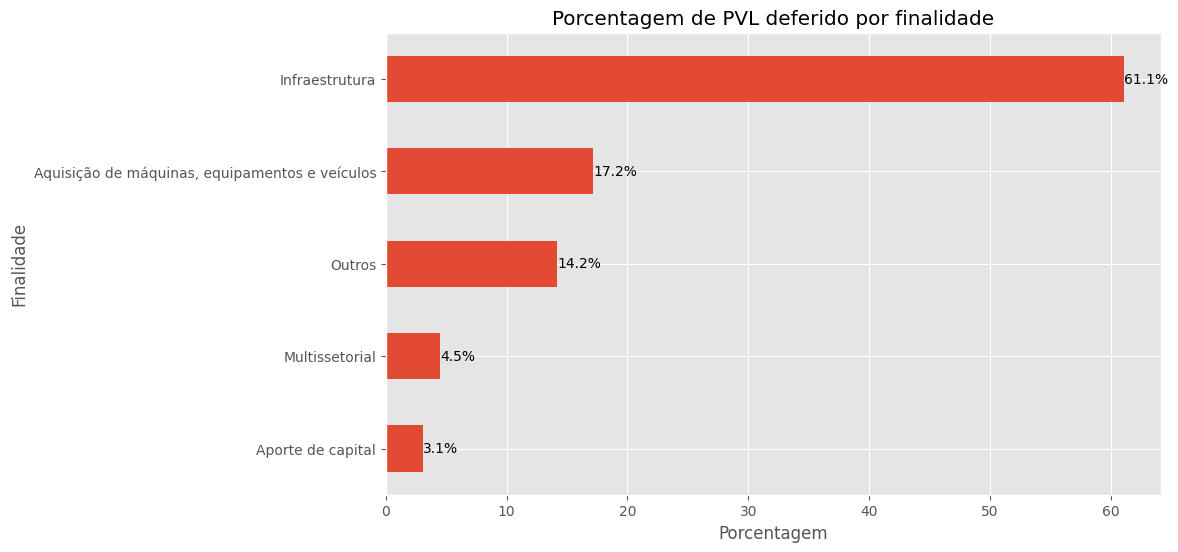

In [ ]:
contagem_finalidade_por_estado = db_credito_aprv.groupby('Finalidade')['UF'].size()

# Calculando a porcentagem em relação ao total
total = contagem_finalidade_por_estado.sum()
porcentagem_finalidade_por_estado = (contagem_finalidade_por_estado / total) * 100

# Selecionando os 3 maiores
top3_porcentagem = porcentagem_finalidade_por_estado.nlargest(4)

# Calculando a porcentagem para "Outros"
outros_porcentagem = 100 - top3_porcentagem.sum()

# Adicionando "Outros" ao dataframe
top3_porcentagem['Outros'] = outros_porcentagem

# Ordenando os valores para plotagem
top3_porcentagem = top3_porcentagem.sort_values(ascending=True)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = top3_porcentagem.plot(kind='barh')

# Adicionando os valores nas barras
for i, v in enumerate(top3_porcentagem.values):
    ax.text(v, i, f'{v:.1f}%', ha='left', va='center')

plt.xlabel('Porcentagem')
plt.ylabel('Finalidade')
plt.title('Porcentagem de PVL deferido por finalidade')
plt.show()


In [ ]:
# Filtrando os dados de infraestrutura
db_infraestrutura = db_credito_aprv[db_credito_aprv['Finalidade'] == 'Infraestrutura']

# Calculando a soma dos valores de investimento em infraestrutura para cada estado
investimento_por_estado = db_infraestrutura.groupby('UF')['Valor'].size()

investimento_por_estado

UF
AC      5
AL      8
AM      4
BA    240
CE     75
DF      1
ES     37
GO    127
MA     39
MG    706
MS     48
MT     58
PA     30
PB     19
PE     60
PI     57
PR    729
RJ     30
RN     36
RO     24
RR      3
RS    587
SC    406
SE     13
SP    712
TO     77
Name: Valor, dtype: int64

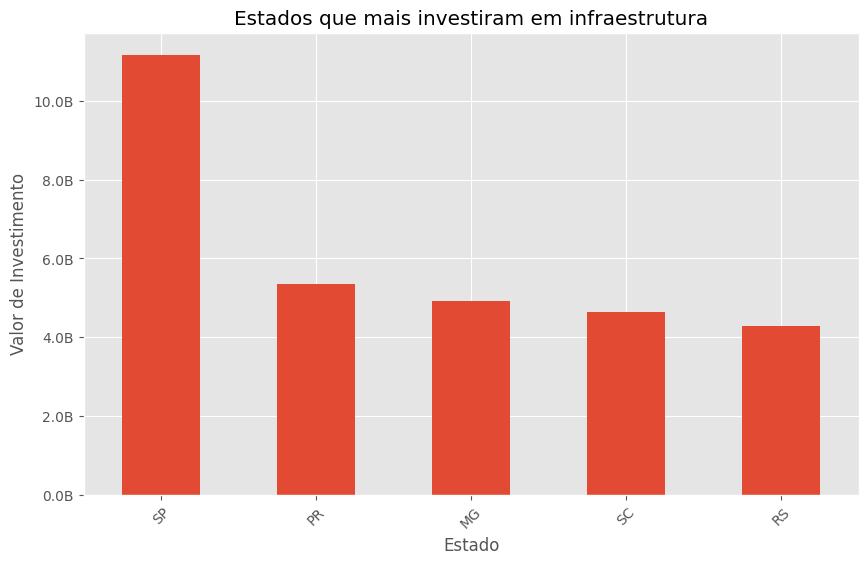

In [ ]:
# Filtrando os dados de infraestrutura
db_infraestrutura = db_credito_aprv[db_credito_aprv['Finalidade'] == 'Infraestrutura']

# Calculando a soma dos valores de investimento em infraestrutura para cada estado
investimento_por_estado = db_infraestrutura.groupby('UF')['Valor'].sum().sort_values(ascending=False)

# Plotando os estados que mais investem em infraestrutura
plt.figure(figsize=(10, 6))
ax = investimento_por_estado.nlargest(5).plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Valor de Investimento')
plt.title('Estados que mais investiram em infraestrutura')

# Aplicando a formatação ao eixo y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))

plt.xticks(rotation=45)
plt.show()


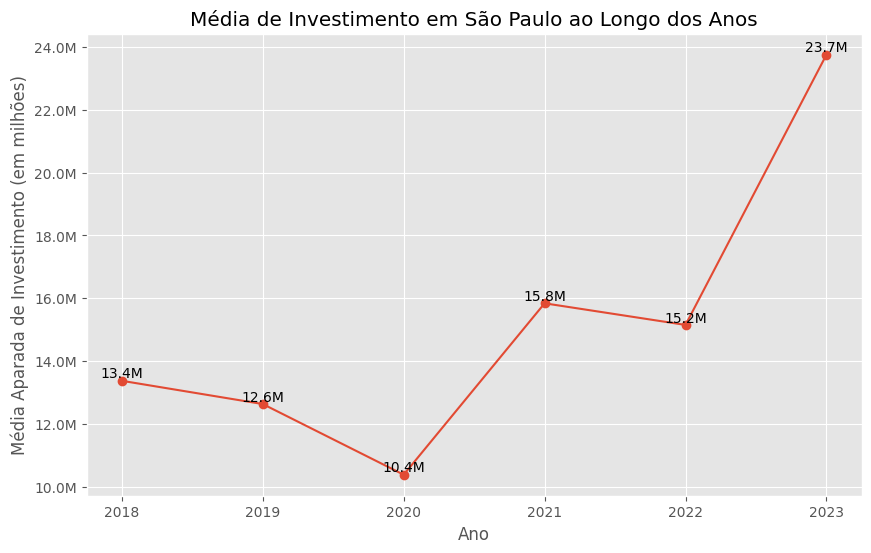

In [ ]:
invest_sp = db_infraestrutura[db_infraestrutura['UF'] == 'SP']

# Calculando a média aparada de investimento para cada ano
media_aparada_por_ano = invest_sp.groupby(invest_sp['Data'].dt.year)['Valor'].mean()

# Plotando a média aparada de investimento ao longo dos anos
plt.figure(figsize=(10, 6))
ax = media_aparada_por_ano.plot(marker='o')
plt.xlabel('Ano')
plt.ylabel('Média Aparada de Investimento (em milhões)')
plt.title('Média de Investimento em São Paulo ao Longo dos Anos')
plt.grid(True)

# Formatando os valores do eixo y para milhões
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Adicionando os valores acima de cada marcador
for x, y in zip(media_aparada_por_ano.index, media_aparada_por_ano.values):
    plt.text(x, y, f'{y / 1e6:.1f}M', ha='center', va='bottom')

plt.show()


In [ ]:
db_credito_aprv[db_credito_aprv['UF'] == 'MG']

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
5,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"700,000.00",PVL02.007525/2019-74,"3,100,104.00",Deferido (PVL-IF),2019-11-20,Instituição Financeira
6,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"2,000,000.00",PVL02.007207/2022-17,"3,100,104.00",Deferido (PVL-IF),2022-09-22,Instituição Financeira
11,Abaeté,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco do Brasil S/A,Real,"700,000.00",PVL02.000722/2021-87,"3,100,203.00",Deferido (PVL-IF),2021-07-19,Instituição Financeira
12,Abaeté,MG,Município,Operação Contratual Interna,Multissetorial,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"4,600,000.00",PVL02.005541/2022-28,"3,100,203.00",Deferido (PVL-IF),2022-07-20,Instituição Financeira
13,Abaeté,MG,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"15,000,000.00",17944.102335/2023-17,"3,100,203.00",Deferido,2023-07-27,STN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25619,Wenceslau Braz,MG,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"1,740,000.00",PVL02.007446/2022-69,"3,172,202.00",Deferido (PVL-IF),2022-08-24,Instituição Financeira
25620,Wenceslau Braz,MG,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"750,000.00",PVL02.007455/2022-50,"3,172,202.00",Deferido (PVL-IF),2022-09-15,Instituição Financeira
25704,Água Boa,MG,Município,Operação Contratual Interna,Multissetorial,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"2,000,000.00",PVL02.002721/2021-77,"3,100,609.00",Deferido (PVL-IF),2021-10-22,Instituição Financeira
25716,Água Comprida,MG,Município,Operação Contratual Interna,Multissetorial,Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"600,000.00",PVL02.002655/2021-35,"3,100,708.00",Deferido (PVL-IF),2021-10-27,Instituição Financeira


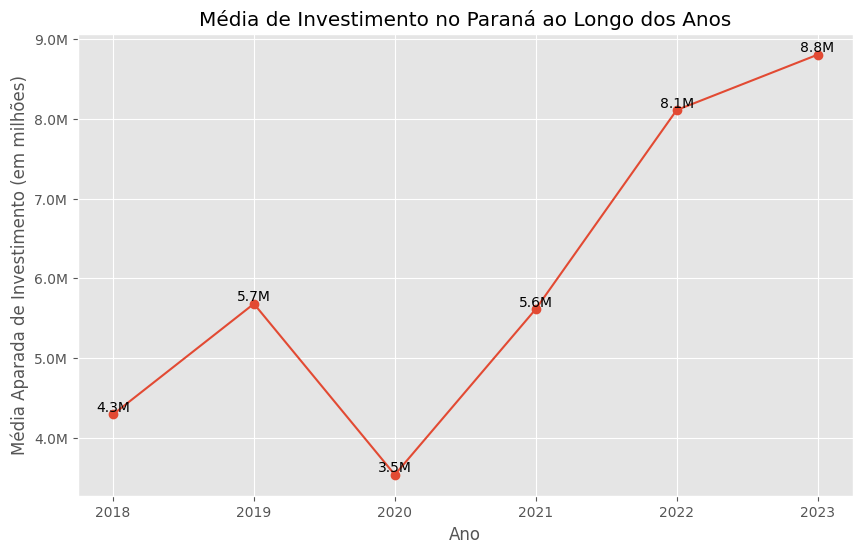

In [ ]:
invest_pr = db_credito_aprv[db_credito_aprv['UF'] == 'PR']

# Calculando a média aparada de investimento para cada ano
media_aparada_por_ano = invest_pr.groupby(invest_pr['Data'].dt.year)['Valor'].mean()

# Plotando a média aparada de investimento ao longo dos anos
plt.figure(figsize=(10, 6))
ax = media_aparada_por_ano.plot(marker='o')
plt.xlabel('Ano')
plt.ylabel('Média Aparada de Investimento (em milhões)')
plt.title('Média de Investimento no Paraná ao Longo dos Anos')
plt.grid(True)

# Formatando os valores do eixo y para milhões
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Adicionando os valores acima de cada marcador
for x, y in zip(media_aparada_por_ano.index, media_aparada_por_ano.values):
    plt.text(x, y, f'{y / 1e6:.1f}M', ha='center', va='bottom')

plt.show()


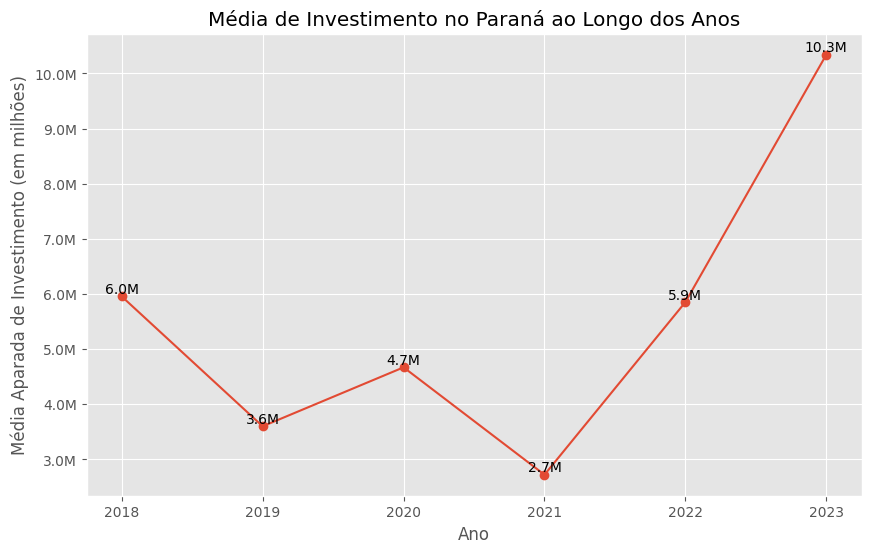

In [ ]:
invest_mg = db_credito_aprv[db_credito_aprv['UF'] == 'MG']

# Calculando a média aparada de investimento para cada ano
media_aparada_por_ano = invest_mg.groupby(invest_mg['Data'].dt.year)['Valor'].mean()

# Plotando a média aparada de investimento ao longo dos anos
plt.figure(figsize=(10, 6))
ax = media_aparada_por_ano.plot(marker='o')
plt.xlabel('Ano')
plt.ylabel('Média Aparada de Investimento (em milhões)')
plt.title('Média de Investimento no Paraná ao Longo dos Anos')
plt.grid(True)

# Formatando os valores do eixo y para milhões
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Adicionando os valores acima de cada marcador
for x, y in zip(media_aparada_por_ano.index, media_aparada_por_ano.values):
    plt.text(x, y, f'{y / 1e6:.1f}M', ha='center', va='bottom')

plt.show()

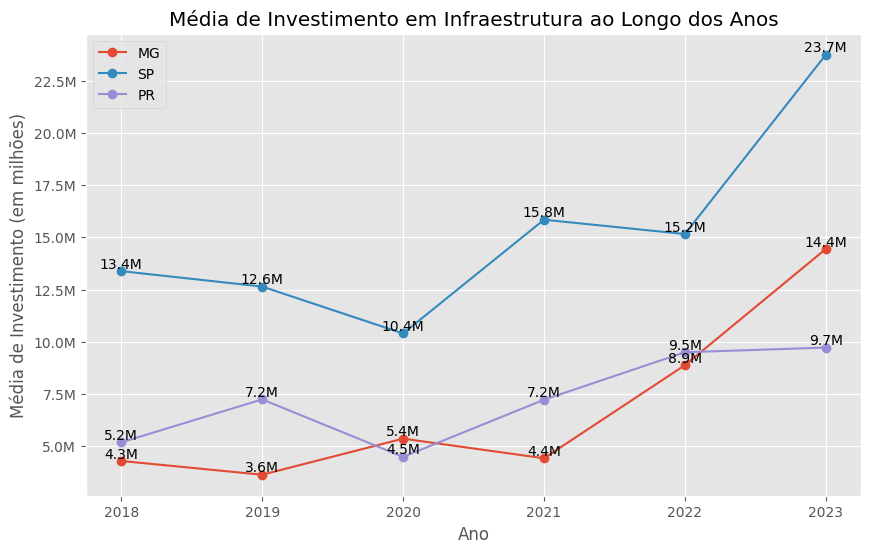

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Filtrando os dados para MG, SP e PR
invest_mg = db_infraestrutura[db_infraestrutura['UF'] == 'MG']
invest_sp = db_infraestrutura[db_infraestrutura['UF'] == 'SP']
invest_pr = db_infraestrutura[db_infraestrutura['UF'] == 'PR']

# Calculando a média de investimento em infraestrutura para cada ano
media_mg = invest_mg.groupby(invest_mg['Data'].dt.year)['Valor'].mean()
media_sp = invest_sp.groupby(invest_sp['Data'].dt.year)['Valor'].mean()
media_pr = invest_pr.groupby(invest_pr['Data'].dt.year)['Valor'].mean()

# Plotando as médias aparadas de investimento ao longo dos anos
plt.figure(figsize=(10, 6))

# Plot para MG
ax = media_mg.plot(marker='o', label='MG')

# Plot para SP
media_sp.plot(marker='o', label='SP', ax=ax)

# Plot para PR
media_pr.plot(marker='o', label='PR', ax=ax)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Média de Investimento (em milhões)')
plt.title('Média de Investimento em Infraestrutura ao Longo dos Anos')
plt.grid(True)
plt.legend()

# Formatando os valores do eixo y para milhões
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Adicionando os valores acima de cada marcador para MG
for x, y in zip(media_mg.index, media_mg.values):
    plt.text(x, y, f'{y / 1e6:.1f}M', ha='center', va='bottom')

# Adicionando os valores acima de cada marcador para SP
for x, y in zip(media_sp.index, media_sp.values):
    plt.text(x, y, f'{y / 1e6:.1f}M', ha='center', va='bottom')

# Adicionando os valores acima de cada marcador para PR
for x, y in zip(media_pr.index, media_pr.values):
    plt.text(x, y, f'{y / 1e6:.1f}M', ha='center', va='bottom')

plt.show()

# Criando arquivo CSV com a media de gastos por estado


In [ ]:
import os
import pandas as pd
from scipy.stats import trim_mean

# Filtrar dados do período de 2018 a 2021
db_credito_periodo = db_credito_aprv[(db_credito_aprv['Data'].dt.year >= 2018) & (db_credito_aprv['Data'].dt.year < 2022)]

# Converter a data para ano
db_credito_periodo['Ano'] = db_credito_periodo['Data'].dt.year

# Definir função para calcular a média aparada
def media_aparada(x):
    return trim_mean(x, 0.20)  # Remove 10% das menores e maiores observações

# Calcular a média aparada de gastos por estado e por ano
media_gastos_por_estado_ano = db_credito_periodo.groupby(['UF', 'Ano'])['Valor'].apply(media_aparada).reset_index()

# Renomear as colunas para o Excel
media_gastos_por_estado_ano.columns = ['Estado', 'Ano', 'Media_Gastos']

# Definir o caminho do diretório onde o arquivo será salvo
diretorio = 'caminho/do/diretorio'

# Verificar se o diretório existe, se não, cria-o
if not os.path.exists(diretorio):
    os.makedirs(diretorio)

# Criar o arquivo Excel no diretório especificado
caminho_arquivo = os.path.join(diretorio, 'media_aparada_gastos_estado_ano_final.xlsx')
media_gastos_por_estado_ano.to_excel(caminho_arquivo, index=False)

print("Arquivo Excel criado com sucesso.")



Arquivo Excel criado com sucesso.


<ipython-input-79-9bd477ed1af1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_credito_periodo['Ano'] = db_credito_periodo['Data'].dt.year
